In [2]:
import numpy as np
import pandas as pd

In [6]:
want_new_data = False

if want_new_data:
    data = pd.read_pickle('crafted_data/playlists_and_trackid_start0_end7400.pkl')
    data['num_tracks_id'] = data['tracks'].apply(lambda row: len(row))
    data = data[data['num_tracks_id'] >= 10]
    max_length = max(data['num_tracks_id'])

    numerical_values = pd.read_pickle('src/tracks_numerical_features.pkl')
    numerical_values = numerical_values.set_index('id')
    X = []
    y = []
    for playlist in data['tracks']:
        curr = []
        for i in range(len(playlist)):
            
            song_id = playlist[i]
            if (i == len(playlist) - 1):
                y.append(np.array(numerical_values.loc[song_id].values))
            else:
                curr.append(np.array(numerical_values.loc[song_id].values))
        to_pad = max_length - len(curr) - 1
        tmp = np.array(curr)
        tmp = np.pad(tmp, pad_width=((to_pad,0), (0,0)), mode='constant')
        X.append(np.array(tmp))
    X = np.array(X)
    y = np.array(y)
    np.save('crafted_data/X', X)
    np.save('crafted_data/y', y)
else:
    X = np.load('crafted_data/X.npy')
    y = np.load('crafted_data/y.npy')

print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (3823, 120, 13)
y shape:  (3823, 13)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y[:,1], test_size=0.20, random_state=42)

In [13]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, ReLU
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers, optimizers
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential, load_model
from keras.datasets import boston_housing
from keras.losses import MeanSquaredError

# hyperparameters
INPUT_SIZE = (X.shape[1], X.shape[2], 1)
EPOCHS = 10
BATCH_SIZE = 128
DROPOUT = 0.10
ACTIVATION = 'sigmoid'
lr = 0.20

#Create model
model = Sequential()

# model.add(Conv2D(filters=32, kernel_size=(3,3)))
# model.add(BatchNormalization())
# model.add(ReLU())

# model.add(Conv2D(filters=32, kernel_size=(3,3)))
# model.add(BatchNormalization())
# model.add(ReLU())

# model.add(Conv2D(filters=32, kernel_size=(3,3)))
# model.add(BatchNormalization())
# model.add(ReLU())

# model.add(Conv2D(filters=64, kernel_size=(3,3)))
# model.add(BatchNormalization())
# model.add(ReLU())

# model.add(Conv2D(filters=64, kernel_size=(3,3)))
# model.add(BatchNormalization())
# model.add(ReLU())

# model.add(Conv2D(filters=64, kernel_size=(3,3)))
# model.add(BatchNormalization())
# model.add(ReLU())

# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# model.add(Conv2D(filters=128, kernel_size=(3,3)))
# model.add(BatchNormalization())
# model.add(ReLU())

# model.add(Conv2D(filters=128, kernel_size=(3,3)))
# model.add(BatchNormalization())
# model.add(ReLU())

# model.add(Conv2D(filters=128, kernel_size=(3,3)))
# model.add(BatchNormalization())
# model.add(ReLU())

# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# model.add(Dropout(DROPOUT))
# model.add(Conv2D(filters=128, kernel_size=(3,3)))
# model.add(BatchNormalization())
# model.add(ReLU())

# model.add(Dropout(DROPOUT))
# model.add(Conv2D(filters=32, kernel_size=(3,3)))
# model.add(BatchNormalization())
# model.add(ReLU())

# model.add(Dense(1, activation=ACTIVATION))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SIZE))
model.add(BatchNormalization())
# model.add(Flatten())
# model.add(Dense(1, activation='linear'))


model.add(Dropout(DROPOUT))
model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(DROPOUT))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(DROPOUT))  
model.add(Flatten())
# model.add(Dense(256, activation=ACTIVATION))
model.add(Dense(128, activation=ACTIVATION))
model.add(Dense(64, activation=ACTIVATION))
model.add(Dense(32, activation=ACTIVATION))
model.add(Dense(16, activation=ACTIVATION))
model.add(Dense(8, activation=ACTIVATION))
model.add(Dense(4, activation=ACTIVATION))
model.add(Dense(2, activation=ACTIVATION))
model.add(Dense(1, activation=ACTIVATION))

mse = MeanSquaredError()
adam = optimizers.Adam(learning_rate=lr, decay=1e-3)
# model.compile(optimizer=adam, loss=mse, metrics = None)

filepath = 'models/cnn/best_cnn_regression_danceability.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks = [checkpoint]

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.build(X[:,:,:,None].shape)
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 118, 11, 32)       320       
                                                                 
 batch_normalization_8 (Batc  (None, 118, 11, 32)      128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 118, 11, 32)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 116, 9, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 116, 9, 64)       256       
 hNormalization)                                                 
                                                                 
 re_lu_2 (ReLU)              (None, 116, 9, 64)       

Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 1179.8575 - mse: 1179.8575
Epoch 1: val_loss improved from inf to 1166.59900, saving model to models/cnn/best_cnn_regression_danceability.hdf5
24/24 [==============================] - 9s 357ms/step - loss: 1179.8575 - mse: 1179.8575 - val_loss: 1166.5990 - val_mse: 1166.5990
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 1179.4384 - mse: 1179.4384
Epoch 2: val_loss improved from 1166.59900 to 1166.20764, saving model to models/cnn/best_cnn_regression_danceability.hdf5
24/24 [==============================] - 9s 355ms/step - loss: 1179.4384 - mse: 1179.4384 - val_loss: 1166.2076 - val_mse: 1166.2076
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 1179.0662 - mse: 1179.0662
Epoch 3: val_loss improved from 1166.20764 to 1165.85779, saving model to models/cnn/best_cnn_regression_danceability.hdf5
24/24 [==============================] - 9s 361ms/step - loss: 1179.0662 - mse: 1179.06

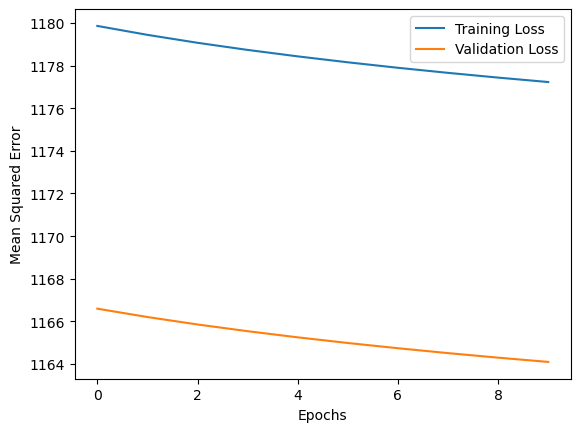

24/24 [==============================] - 1s 18ms/step
Best model MSE on test data =  0.067891605


In [14]:
data = X.reshape(X.shape[0],X.shape[1], X.shape[2], 1)

history = model.fit(data, y, batch_size=BATCH_SIZE, epochs=EPOCHS,
                  validation_split=0.2,
                  callbacks=callbacks)

#plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.savefig('images/cnn_danceability_training_history')
plt.show()

#Load and evaluate the best model version
model = load_model(filepath)
yhat = model.predict(X_test)
print('Best model MSE on test data = ', mse(y_test, yhat).numpy())

In [15]:
tracks = pd.read_csv('src/tracks_features.csv')
tracks = tracks[['id', 'name', 'album', 'artists']]

In [16]:
filtered = tracks[tracks['name'] == 'So What']
# filtered = filtered[filtered['album'] == 'Kind of Blue']
my_artist = 'Miles Davis'
filtered['right artist'] = filtered['artists'].apply(lambda row: 1 if my_artist in row else 0)
filtered = filtered[filtered['right artist'] == 1]
filtered.head(10)

/var/folders/jc/l8gc1q891rl5rcv8zg4yjywm0000gn/T/ipykernel_36531/2862184830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['right artist'] = filtered['artists'].apply(lambda row: 1 if my_artist in row else 0)


,id,name,album,artists,right artist
343923,7rsrrtdmzBv09v3dspuq5M,So What,The Best Of Ken Burns Jazz,['Miles Davis'],1
657801,0LcbNWzkAnC0BASstAjzSf,So What,Jazz: The Definitive Performances,['Miles Davis'],1
856381,3mZ33QYHWylbabTz82rHwj,So What,Pleasantville -Music From The Motion Picture,['Miles Davis'],1
1190552,4vLYewWIvqHfKtJDk8c8tq,So What,Kind Of Blue (Legacy Edition),['Miles Davis'],1


In [17]:
my_track = '4vLYewWIvqHfKtJDk8c8tq'
data = pd.read_pickle('crafted_data/playlists_and_trackid_start0_end7400.pkl')
data['num_tracks_id'] = data['tracks'].apply(lambda row: len(row))
data = data[data['num_tracks_id'] >= 10]
my_playlists = data.copy()
my_playlists['interest'] = my_playlists['tracks'].apply(lambda row: 1 if my_track in row else 0)

In [18]:
my_playlists = my_playlists[my_playlists['interest'] == 1]
print(my_playlists.shape)
my_playlists.head(my_playlists.shape[0])

(5, 6)


,pid,name,tracks,num_tracks,num_tracks_id,interest
83,2083,chill,"[3z0kLcBMR7fzsYjfrtWFf2, 1YVc2NJBwOtAebQiSUbt5...",100,29,1
128,4128,Gold,"[2wBf6PGWOMrrAykBmxIF9X, 75Bf3tD7wCLxIc3C6GCER...",213,42,1
490,5490,Thanksgiving,"[5wL742yBgvtbw1IibA3FMJ, 70UB5GwrRIDLfAHiQttyk...",62,21,1
815,6815,JAZZ,"[0PHqHvmg4TIaANfbsvDMTR, 4mh17mzDplLjImZg1I3iv...",179,39,1
259,7259,ENgagement party,"[6q0lIjDSuZDhrg9GC9yUQO, 5qGavrnGfH766WNp5pZXS...",36,11,1


In [19]:
my_playlist = X[82].reshape(1, X[82].shape[0], X[82].shape[1], 1)
next_song = model.predict(my_playlist)
print(next_song)

1/1 [==============================] - 0s 151ms/step
[[0.7620884]]
